In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 0. import part

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer

In [ ]:
seed = 1234
np.random.seed(seed)

# 1. 데이터 로드

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/데브코스/project_3/superstore_data.csv')

data.head()

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/2014,0,189,...,111,189,218,1,4,4,6,1,1,0
1,1,1961,Graduation,Single,57091.0,0,0,6/15/2014,0,464,...,7,0,37,1,7,3,7,5,1,0
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/2014,0,134,...,15,2,30,1,3,2,5,2,0,0
3,1386,1967,Graduation,Together,32474.0,1,1,11/5/2014,0,10,...,0,0,0,1,1,0,2,7,0,0
4,5371,1989,Graduation,Single,21474.0,1,0,8/4/2014,0,6,...,11,0,34,2,3,1,2,7,1,0


# 2. 기본 분석 / 기초 통계 분석

In [ ]:
# 기본 분석
data.info()
# 결측치 Income의 경우 3, 3개의 object 변수

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [ ]:
# 기초 통계량
summary_statistics = data.describe(include='all')
print(summary_statistics)

                  Id   Year_Birth   Education Marital_Status         Income  \
count    2240.000000  2240.000000        2240           2240    2216.000000   
unique           NaN          NaN           5              8            NaN   
top              NaN          NaN  Graduation        Married            NaN   
freq             NaN          NaN        1127            864            NaN   
mean     5592.159821  1968.805804         NaN            NaN   52247.251354   
std      3246.662198    11.984069         NaN            NaN   25173.076661   
min         0.000000  1893.000000         NaN            NaN    1730.000000   
25%      2828.250000  1959.000000         NaN            NaN   35303.000000   
50%      5458.500000  1970.000000         NaN            NaN   51381.500000   
75%      8427.750000  1977.000000         NaN            NaN   68522.000000   
max     11191.000000  1996.000000         NaN            NaN  666666.000000   

            Kidhome     Teenhome Dt_Customer      R

In [ ]:
data.columns

Index(['Id', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'Response', 'Complain'],
      dtype='object')

In [ ]:
# 중복 id X
data['Id'].nunique()

2240

# 3. 데이터 전처리

In [ ]:
# Year_Birth to Age
data['Age'] = 2023 - data['Year_Birth']
data.head()

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain,Age
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/2014,0,189,...,189,218,1,4,4,6,1,1,0,53
1,1,1961,Graduation,Single,57091.0,0,0,6/15/2014,0,464,...,0,37,1,7,3,7,5,1,0,62
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/2014,0,134,...,2,30,1,3,2,5,2,0,0,65
3,1386,1967,Graduation,Together,32474.0,1,1,11/5/2014,0,10,...,0,0,1,1,0,2,7,0,0,56
4,5371,1989,Graduation,Single,21474.0,1,0,8/4/2014,0,6,...,0,34,2,3,1,2,7,1,0,34


In [ ]:
# Dt_Customer to Use_Period

data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'])
latest_date = pd.to_datetime('2023-01-01')
data['Use_Period'] = (latest_date - data['Dt_Customer']).dt.days
data.head()

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain,Age,Use_Period
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,...,218,1,4,4,6,1,1,0,53,3121
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,...,37,1,7,3,7,5,1,0,62,3122
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,...,30,1,3,2,5,2,0,0,65,3155
3,1386,1967,Graduation,Together,32474.0,1,1,2014-11-05,0,10,...,0,1,1,0,2,7,0,0,56,2979
4,5371,1989,Graduation,Single,21474.0,1,0,2014-08-04,0,6,...,34,2,3,1,2,7,1,0,34,3072


In [ ]:
# Income 결측치 처리

imputer = SimpleImputer(strategy='mean')
imputer.fit(data[['Income']])
data['Income'] = imputer.transform(data[['Income']])

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Id                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2240 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

In [ ]:
# 시각화를 위한 자료형 구분, id의 경우 식별자 이므로 제외

target_column = ['Response']
numeric_columns = ['Age', 'Use_Period', 'Kidhome', 'Teenhome', 'Income', 'Recency',
                   'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
                   'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
                   'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
                   'NumWebVisitsMonth']
category_columns = ['Education', 'Marital_Status', 'Complain']

# 4. 시각화

### 수치형 데이터

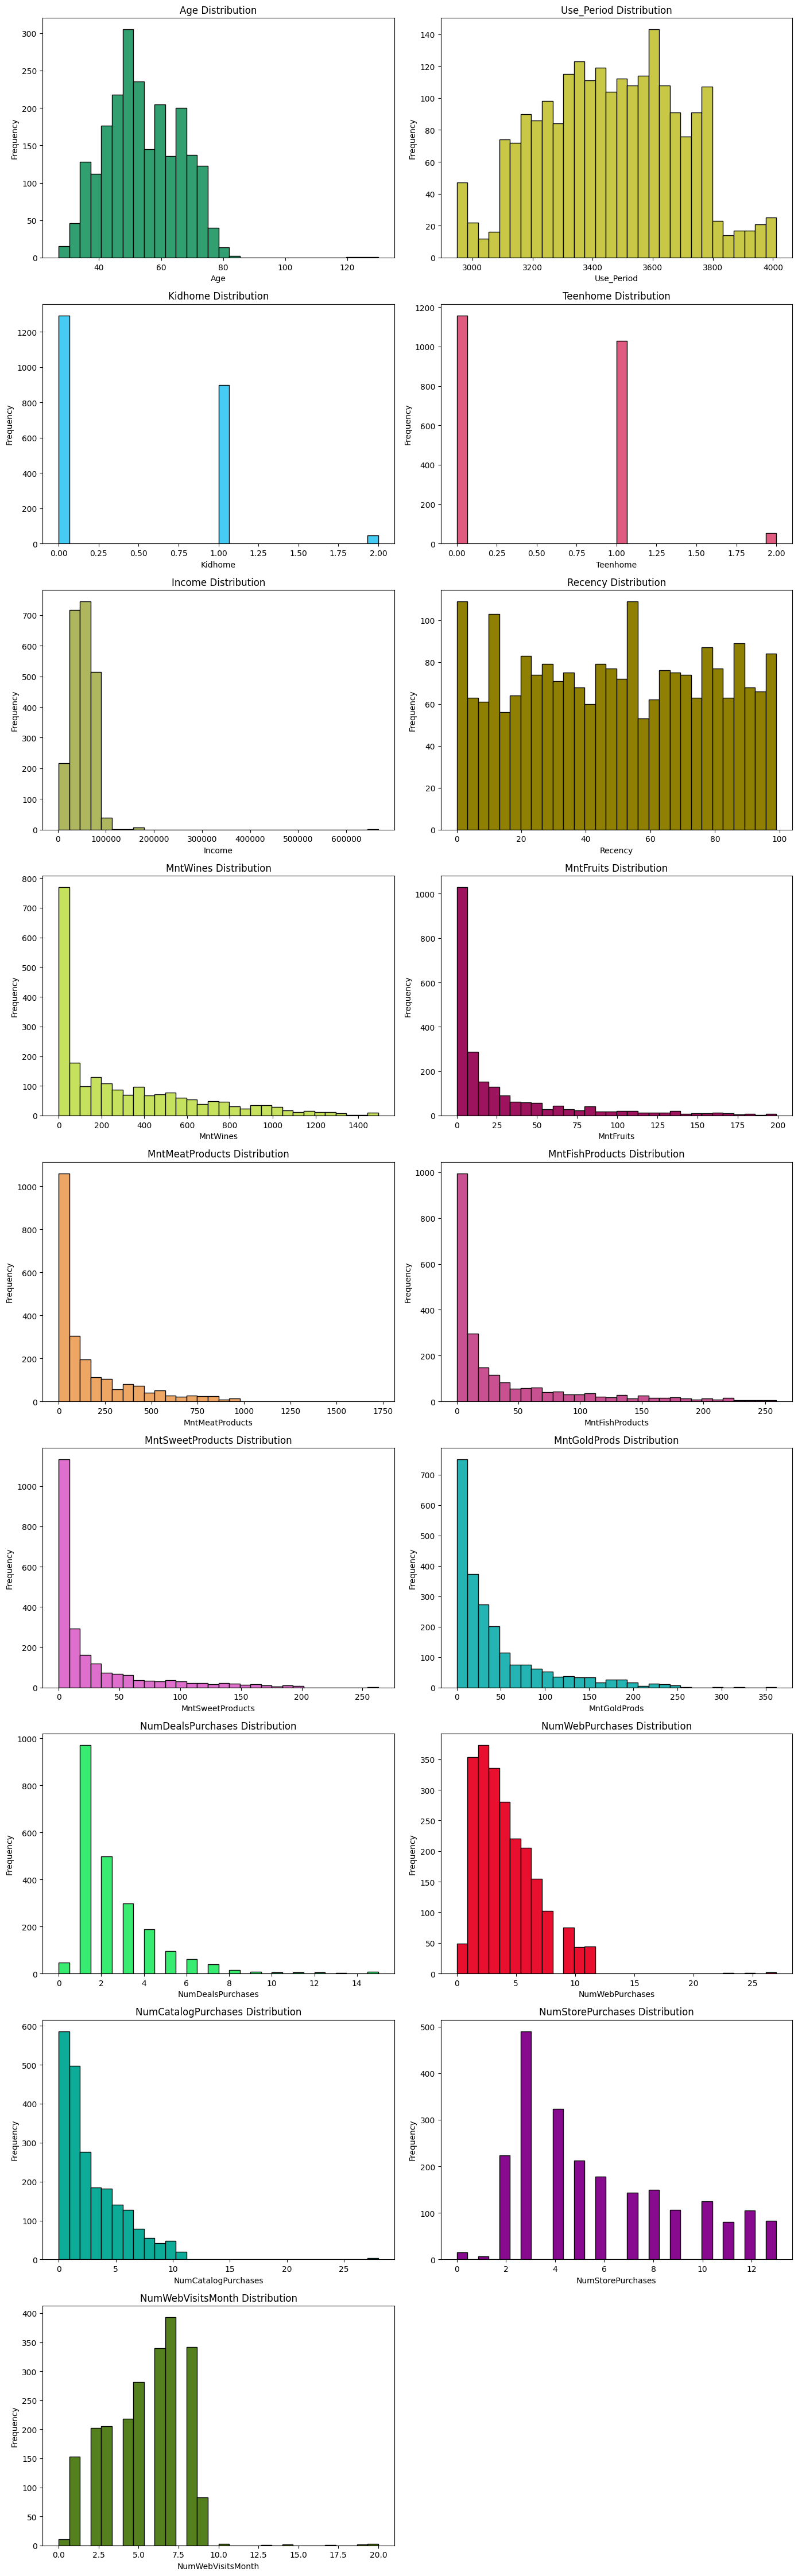

In [ ]:
# 수치형 데이터의 전체적인 분포
numeric_data = data[numeric_columns]

plt.figure(figsize=(14, 45))

np.random.seed(seed)
for idx, numeric in enumerate(numeric_columns) :
    col = (np.random.random(), np.random.random(), np.random.random())

    plt.subplot(9, 2, idx+1)
    plt.hist(numeric_data[numeric], bins=30, color=col, edgecolor='black')
    plt.title(f'{numeric} Distribution')
    plt.xlabel(numeric)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

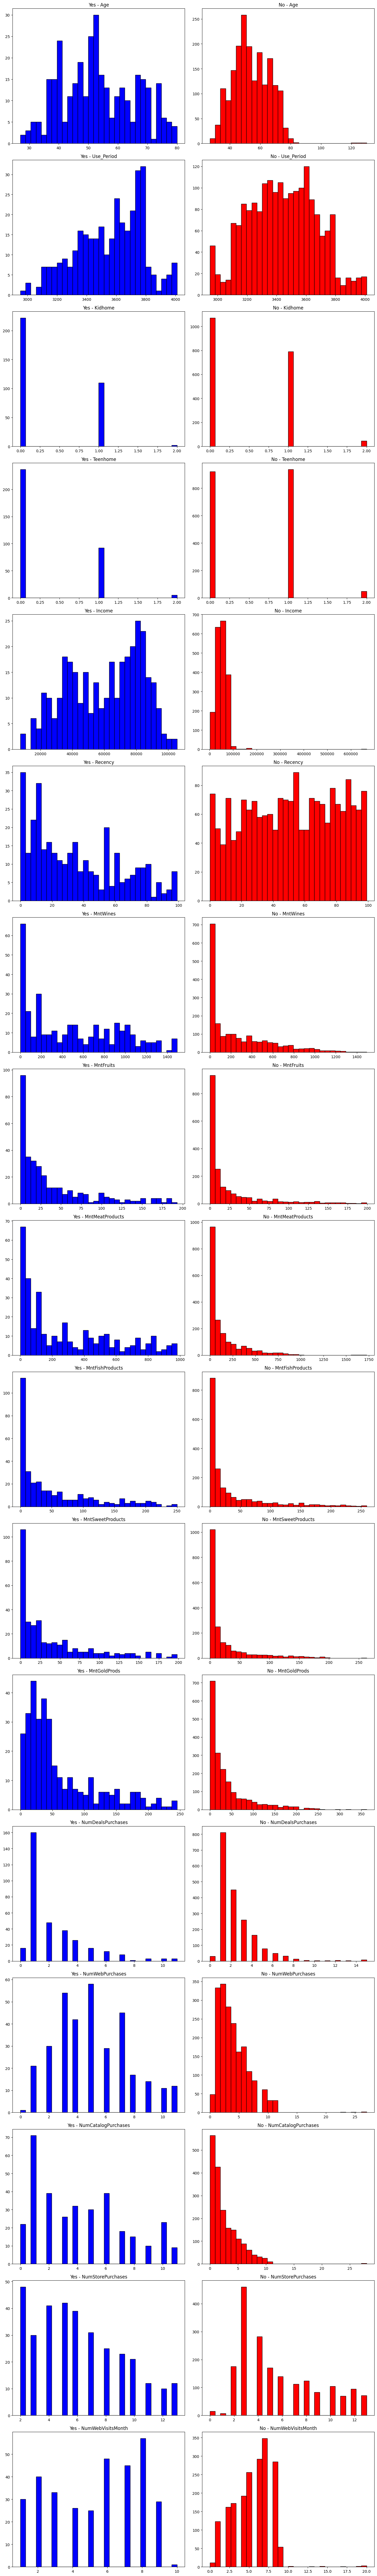

In [ ]:
# 클래스 별 시각화
response = data[data['Response'] == 1]
no_response = data[data['Response'] == 0]

plt.figure(figsize=(14, 95))

for idx, column in enumerate(numeric_columns):
    plt.subplot(len(numeric_columns), 2, 2*idx + 1)
    plt.hist(response[column], color='blue', label='Yes', bins=30, edgecolor='black')
    plt.title(f'Yes - {column}')

    plt.subplot(len(numeric_columns), 2, 2*idx + 2)
    plt.hist(no_response[column], color='red', label='No', bins=30, edgecolor='black')
    plt.title(f'No - {column}')

plt.tight_layout()
plt.show()

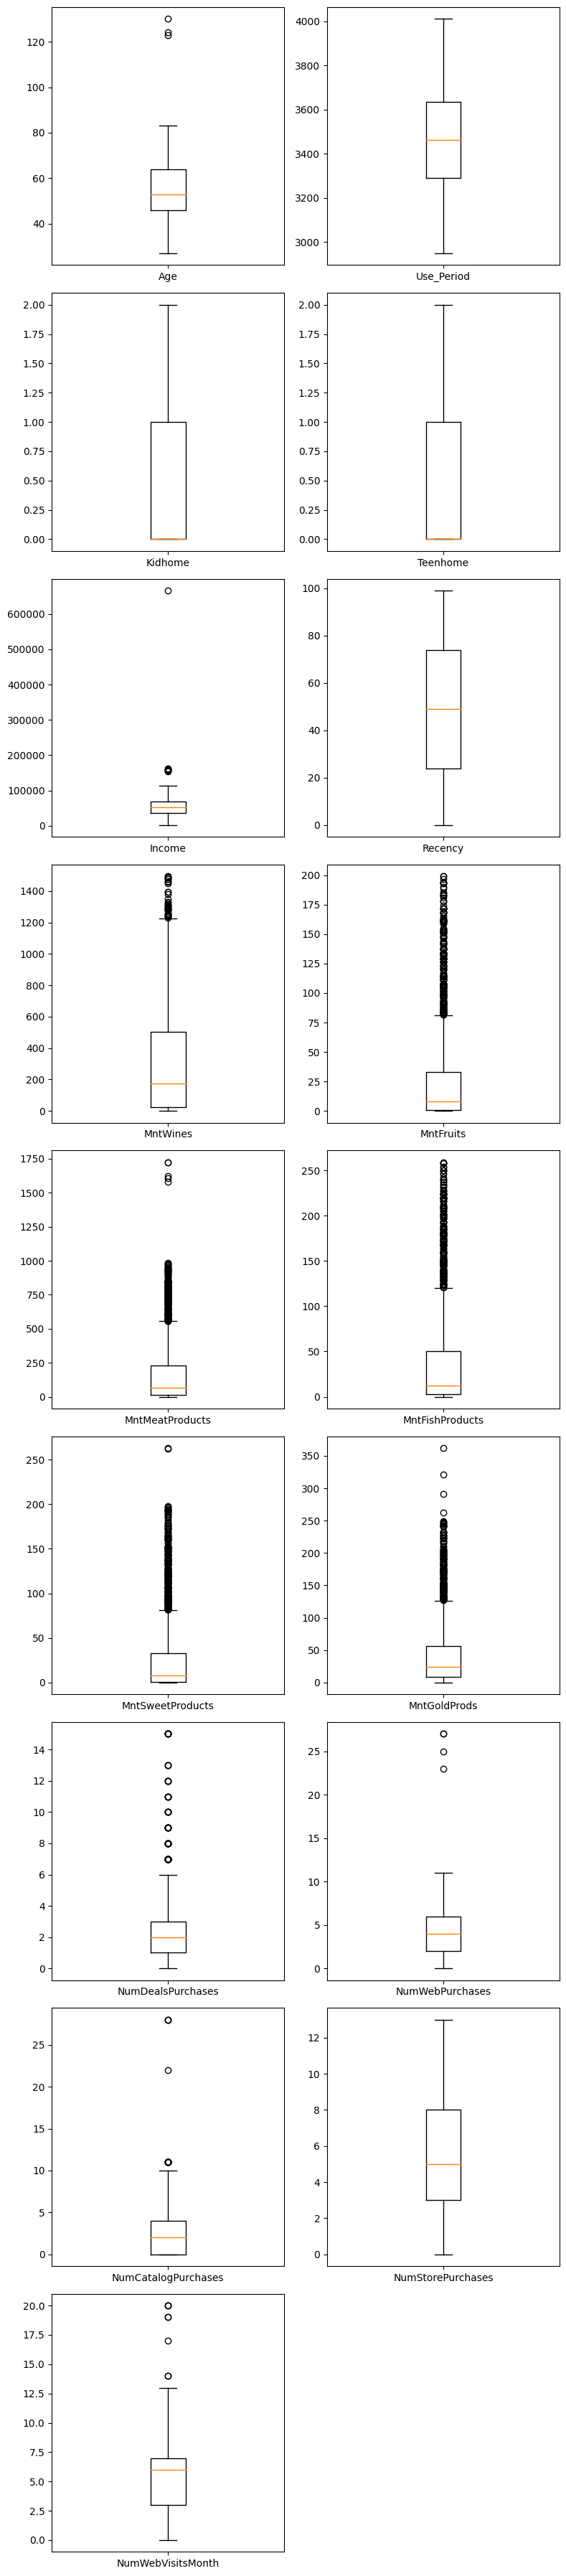

In [ ]:
# 아웃 라이어 확인

plt.figure(figsize=(8, 36))

np.random.seed(seed)
for idx, numeric in enumerate(numeric_columns) :

    plt.subplot(9, 2, idx+1)
    plt.boxplot(numeric_data[numeric].dropna(), labels=[numeric])

plt.tight_layout()
plt.show()

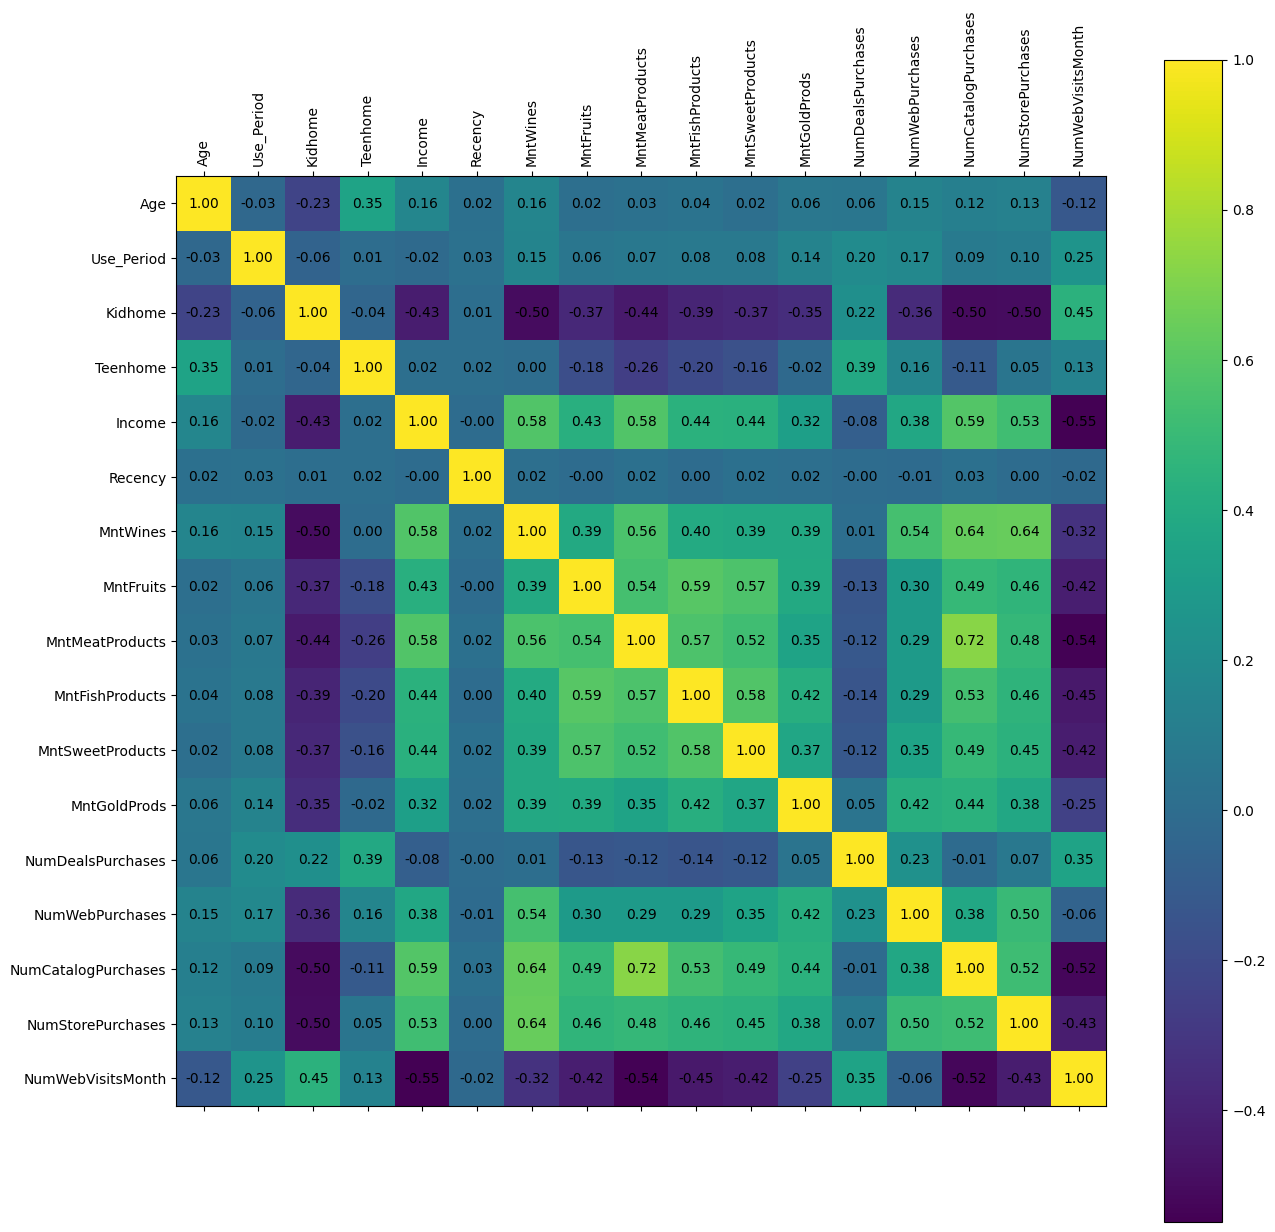

In [ ]:
# 상관 관계

correlation_matrix = numeric_data.corr()

# 상관관계 메트릭스 시각화
plt.figure(figsize=(15, 15))

plt.matshow(correlation_matrix, fignum=1)
plt.colorbar()
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=90)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)

for (i, j), val in np.ndenumerate(correlation_matrix):
    plt.text(j, i, '{:0.2f}'.format(val), ha='center', va='center', color='black')

plt.show()

### 카테고리형 데이터

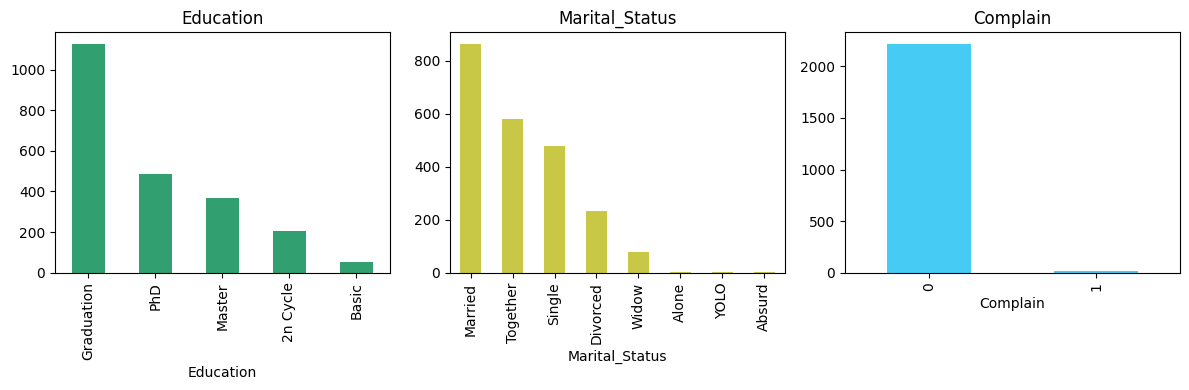

In [ ]:
# 카테고형 데이터의 전체적인 분포

category_data = data[category_columns]

plt.figure(figsize=(12, 4))

np.random.seed(seed)
for idx, category in enumerate(category_columns) :
    col = (np.random.random(), np.random.random(), np.random.random())

    plt.subplot(1, 3, idx+1)
    category_data[category].value_counts().plot(kind='bar', color=col)
    plt.title(category)
    plt.tight_layout()

plt.tight_layout()
plt.show()

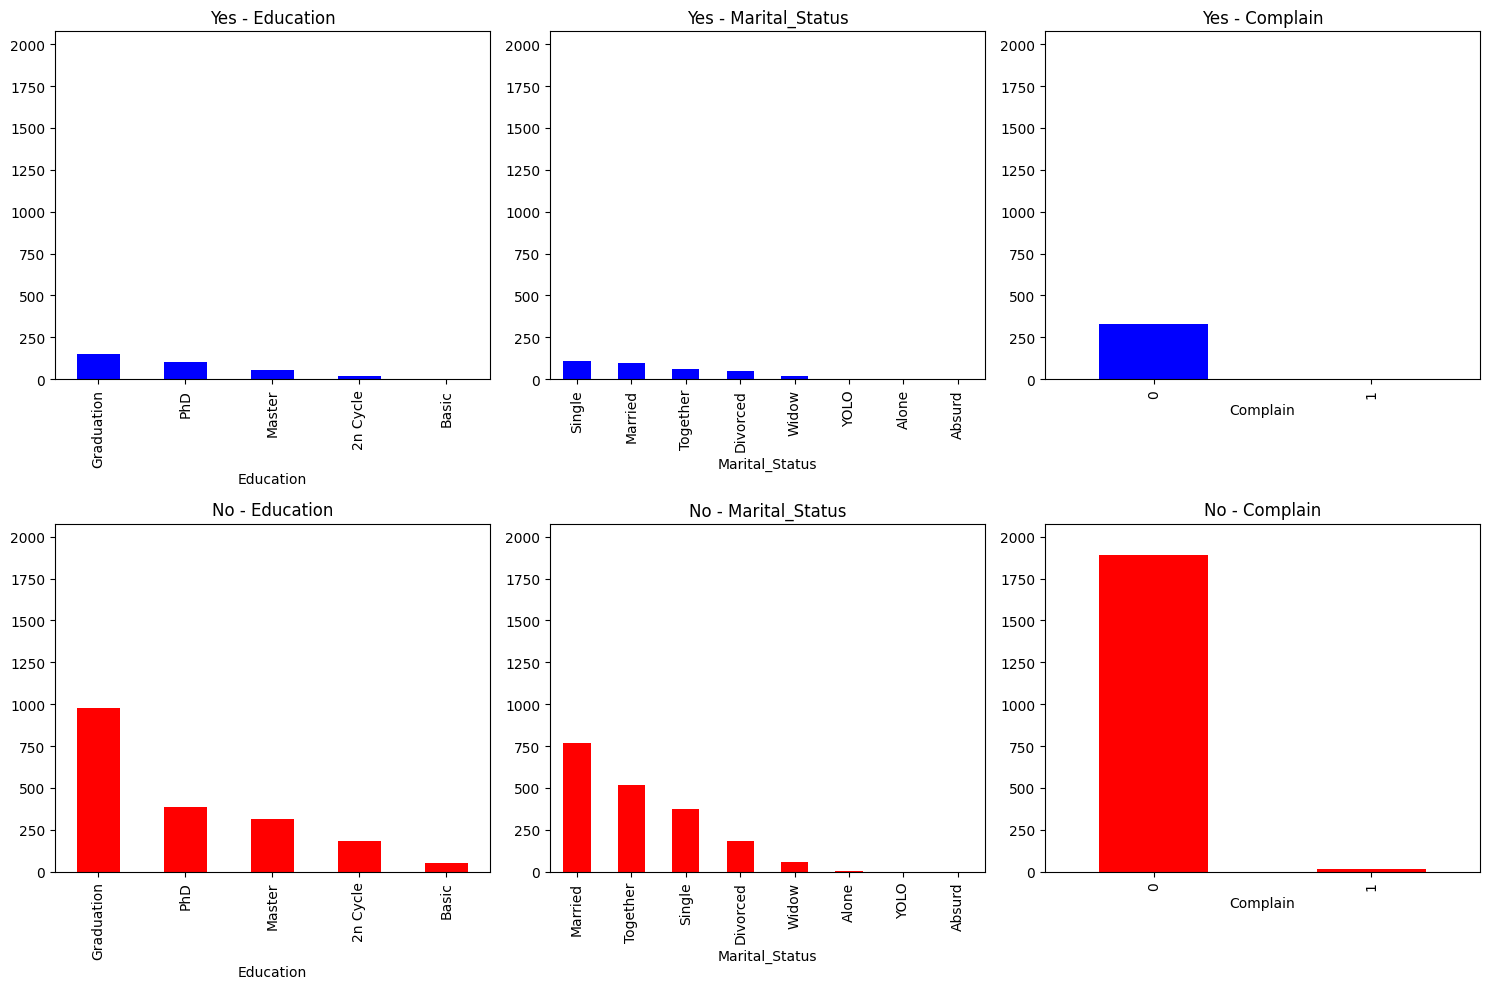

In [ ]:
# 클래스 별 시각화

plt.figure(figsize=(15, 10))

max_count_response = max(response[column].value_counts().max() for column in category_columns)
max_count_no_response = max(no_response[column].value_counts().max() for column in category_columns)
max_count = max(max_count_response, max_count_no_response) * 1.1

for idx, column in enumerate(category_columns):
    plt.subplot(2, 3, idx + 1)
    response[column].value_counts().plot(kind='bar', color='blue')
    plt.title(f'Yes - {column}')
    plt.ylim(0, max_count)
    plt.tight_layout()

    plt.subplot(2, 3, idx + 4)
    no_response[column].value_counts().plot(kind='bar', color='red')
    plt.title(f'No - {column}')
    plt.ylim(0, max_count)
    plt.tight_layout()

plt.show()

# 5. 인코딩 후 상관 관계 분석

In [ ]:
# 인코딩

category_encoded = pd.get_dummies(data[category_columns], drop_first=True)
target_encoded = pd.get_dummies(data[target_column], drop_first=True)

data_encoded = pd.concat([target_encoded,
                          data[numeric_columns], category_encoded], axis=1)

data_encoded.head()

,Response,Age,Use_Period,Kidhome,Teenhome,Income,Recency,MntWines,MntFruits,MntMeatProducts,...,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO
0,1,53,3121,0,0,84835.0,0,189,104,379,...,True,False,False,False,True,False,False,False,False,False
1,1,62,3122,0,0,57091.0,0,464,5,64,...,True,False,False,False,False,False,True,False,False,False
2,0,65,3155,0,1,67267.0,0,134,11,59,...,True,False,False,False,False,True,False,False,False,False
3,0,56,2979,1,1,32474.0,0,10,0,1,...,True,False,False,False,False,False,False,True,False,False
4,1,34,3072,1,0,21474.0,0,6,16,24,...,True,False,False,False,False,False,True,False,False,False


In [ ]:
data_encoded[['Response']].columns[0]

'Response'

In [ ]:
target_encoded.columns[0]

'Response'

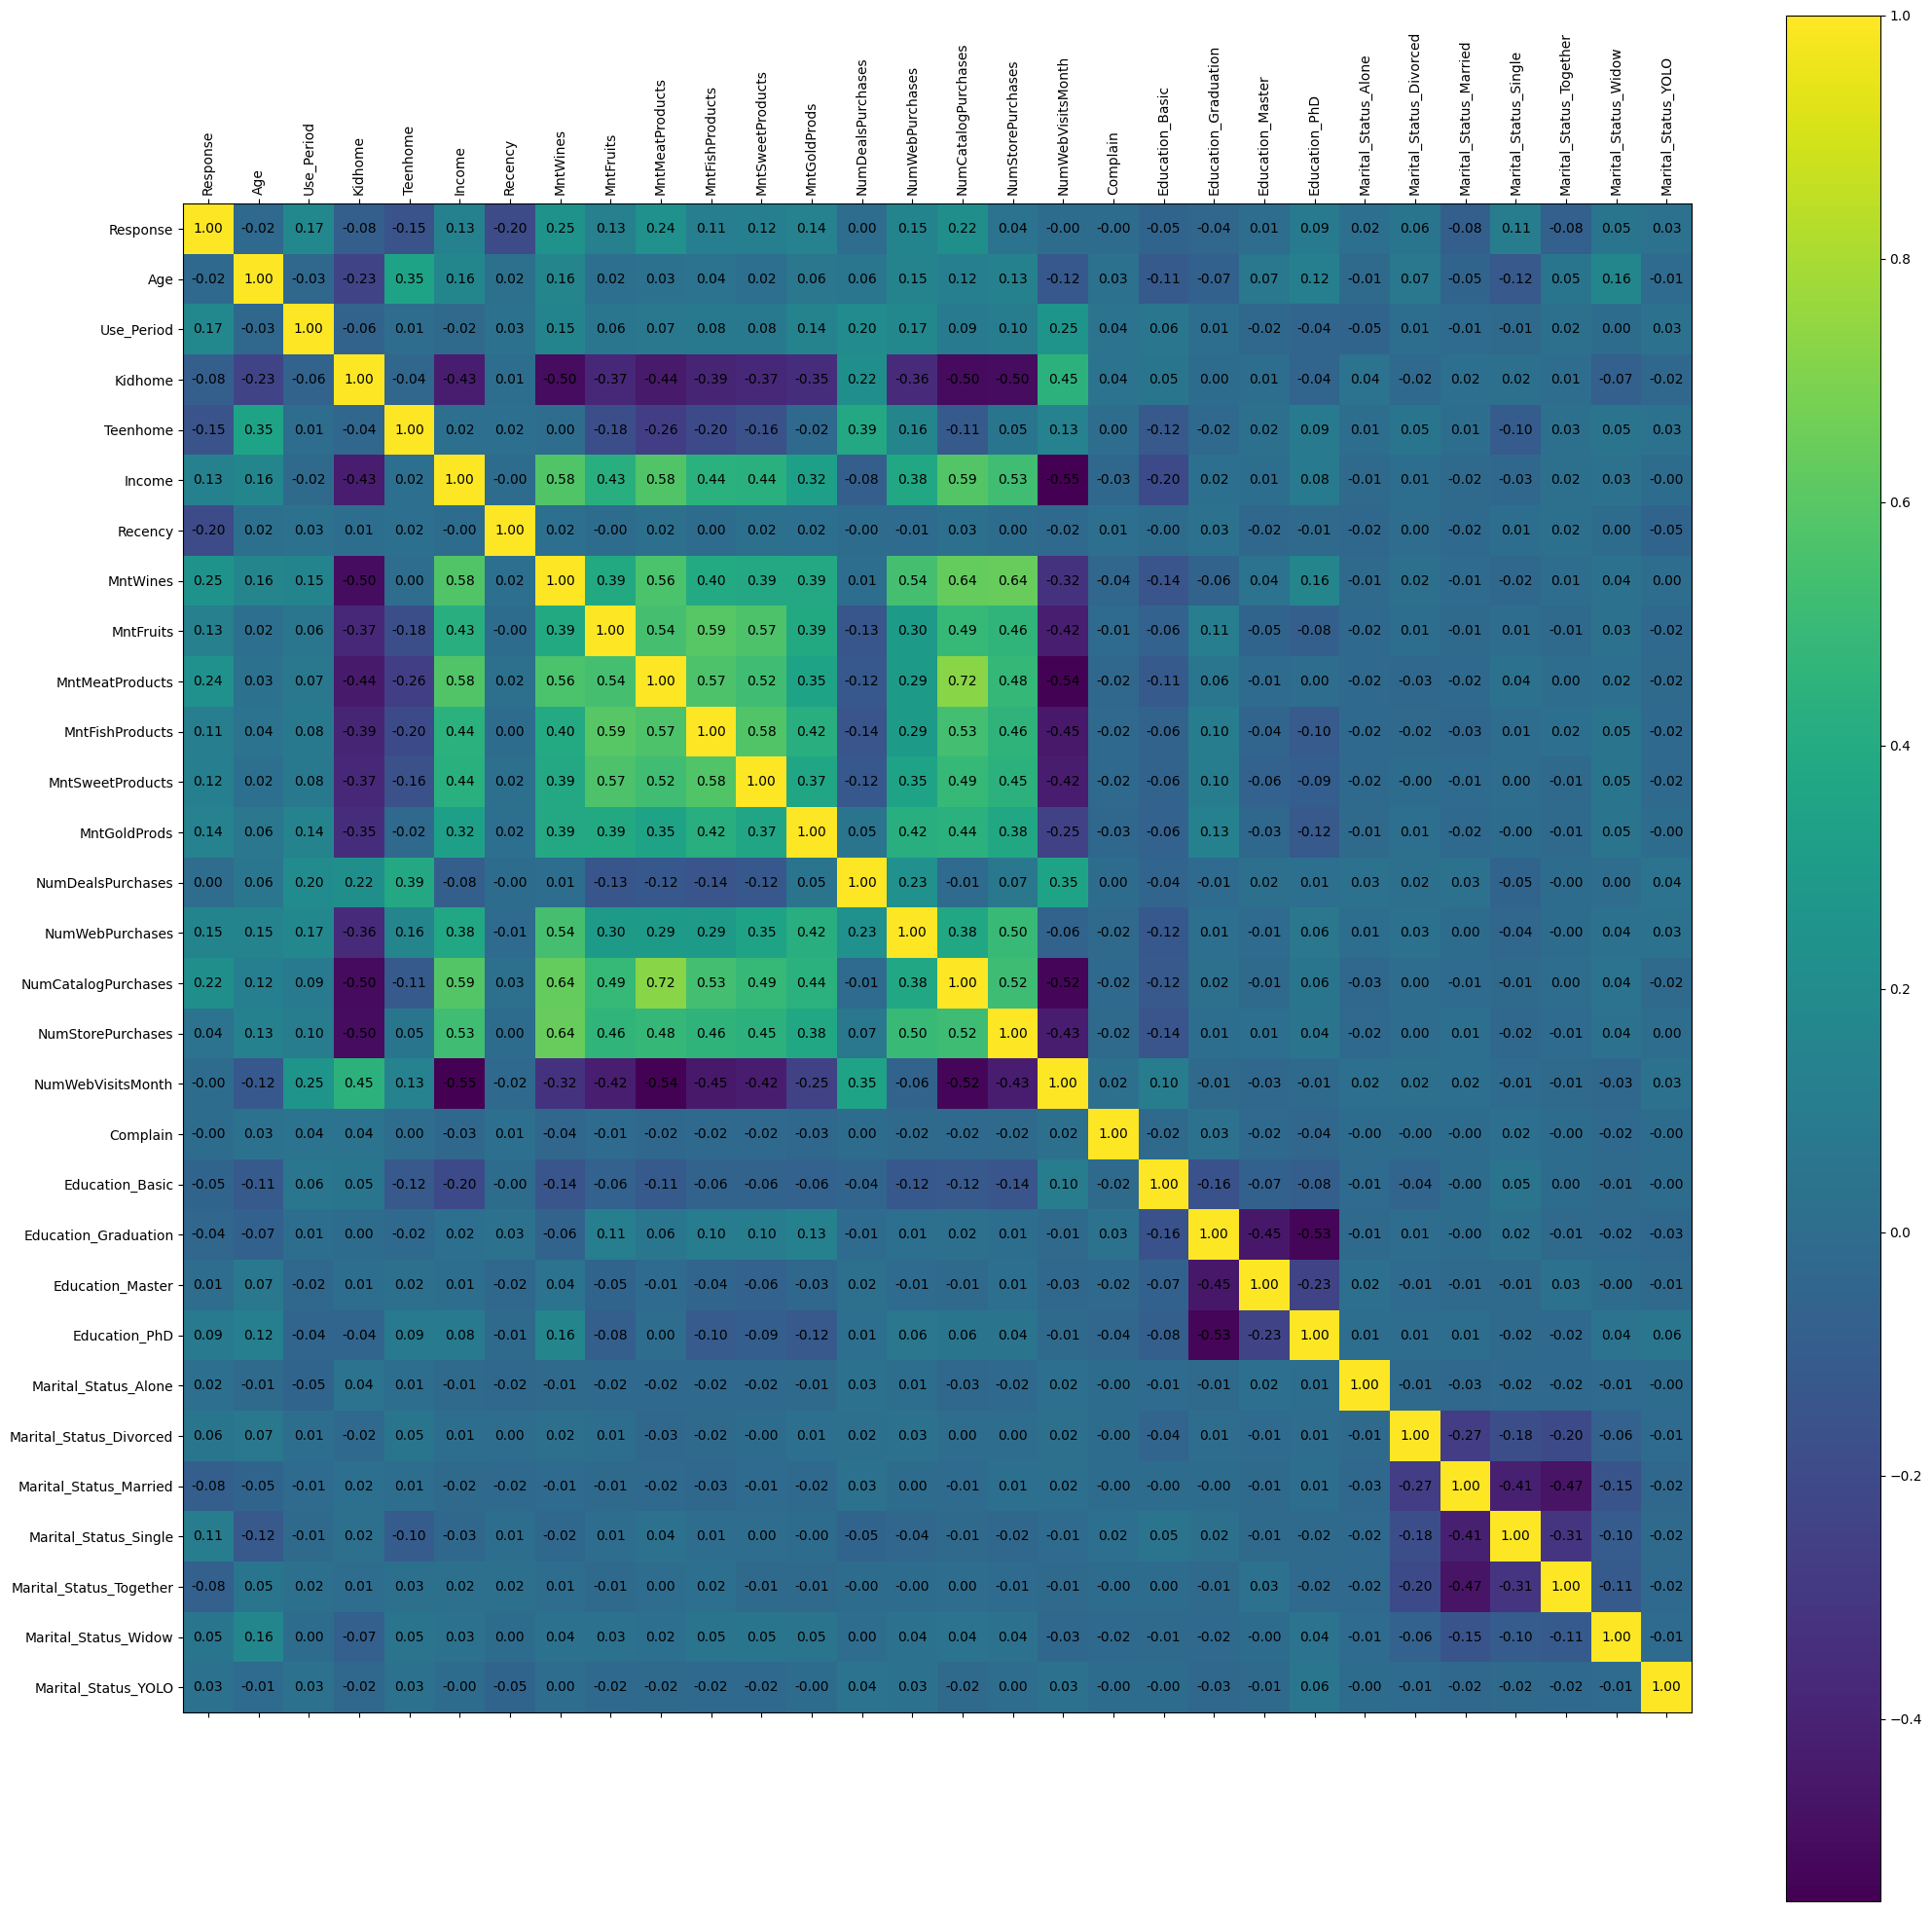

In [ ]:
# 상관 관계 분석

correlation_matrix_encoded = data_encoded.corr()

plt.figure(figsize=(25, 25))

plt.matshow(correlation_matrix_encoded, fignum=1)
plt.colorbar()
plt.xticks(range(len(correlation_matrix_encoded.columns)), correlation_matrix_encoded.columns, rotation=90)
plt.yticks(range(len(correlation_matrix_encoded.columns)), correlation_matrix_encoded.columns)

for (i, j), val in np.ndenumerate(correlation_matrix_encoded):
    plt.text(j, i, '{:0.2f}'.format(val), ha='center', va='center', color='black')

plt.show()

In [ ]:
select_num = 15
target_correlations = correlation_matrix_encoded[target_encoded.columns[0]].abs().sort_values(ascending=False)
top_features_with_target = target_correlations[1:select_num+1].index.tolist()
top_features_with_target

['MntWines',
 'MntMeatProducts',
 'NumCatalogPurchases',
 'Recency',
 'Use_Period',
 'Teenhome',
 'NumWebPurchases',
 'MntGoldProds',
 'Income',
 'MntFruits',
 'MntSweetProducts',
 'MntFishProducts',
 'Marital_Status_Single',
 'Education_PhD',
 'Kidhome']

# 7. 인코딩 및 전처리 데이터 프레임 csv 파일로 변환 후 저장

In [ ]:
data_encoded.to_csv('data_ver_2.csv', index=False)